<a href="https://colab.research.google.com/github/gorkemgok0/Iris_-w_SVM-Logistic/blob/main/Iris_w_SVM%26Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/11-iris.csv')

In [ ]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df=df.drop('Id',axis=1)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.tail()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
df["Species"].value_counts()

,count
Species,
0,50
1,50
2,50


In [ ]:
X=df.drop("Species",axis=1)
y=df["Species"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print(ac)
print(cr)

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid={
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto", 0.1, 1, 10],
    "degree": [2, 3, 4]
}

In [ ]:
grid = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("En iyi parametreler:", grid.best_params_)
print("En iyi skor:", grid.best_score_)

En iyi parametreler: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
En iyi skor: 0.9640316205533598


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=grid.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
cr=classification_report(y_test, y_pred)
print(cr,cm,ac)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]] 1.0


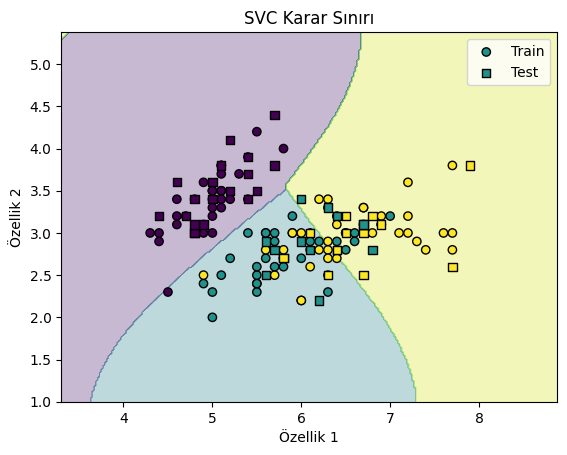

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Örnek veri (iris'ten sadece 2 özellik)
iris = datasets.load_iris()
X = iris.data[:, :2]   # sadece ilk 2 özellik
y = iris.target

# Eğitim/Test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X_train, y_train)

# Meshgrid (karar sınırını çizmek için)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Tahmin
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Çizim
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label="Test")

plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.title("SVC Karar Sınırı")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Parametre kümesi
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1,10,20, 100], 'solver': ['liblinear']},
    {'penalty': ['l2', None], 'C': [0.01, 0.1, 1,5,8,9,10,11,13,15, 10, 100], 'solver': ['lbfgs']},
    {'penalty': ['l1', 'l2', 'elasticnet', None], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0, 0.5, 1]}
]


# GridSearch
grid1 = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid1.fit(X_train, y_train)

print("En iyi parametreler:", grid1.best_params_)
print("En iyi skor:", grid1.best_score_)

En iyi parametreler: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
En iyi skor: 0.819047619047619


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=grid1.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [ ]:
cr=classification_report(y_test, y_pred)
print(cr,cm,ac)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]] 0.8222222222222222


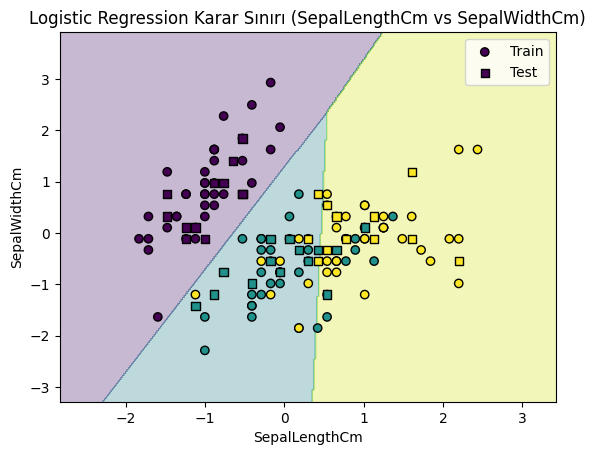

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select the first two features for visualization from the original DataFrame
X_plot_lr = df[['SepalLengthCm', 'SepalWidthCm']]
y_plot_lr = df['Species'] # Use the 'Species' column from the original DataFrame

# Split the data for the plot model
X_train_plot_lr, X_test_plot_lr, y_train_plot_lr, y_test_plot_lr = train_test_split(X_plot_lr, y_plot_lr, test_size=0.25, random_state=15)

# Scale the data for the plot model
sc_plot_lr = StandardScaler()
X_train_plot_lr_scaled = sc_plot_lr.fit_transform(X_train_plot_lr)
X_test_plot_lr_scaled = sc_plot_lr.transform(X_test_plot_lr)

# Train a new Logistic Regression model with only the two features and best parameters from grid1
plot_model_lr = LogisticRegression(C=grid1.best_params_['C'],
                                   penalty=grid1.best_params_['penalty'],
                                   solver=grid1.best_params_['solver'],
                                   max_iter=1000) # Use max_iter from the original definition

# Handle potential l1_ratio if elasticnet was the best penalty
if plot_model_lr.penalty == 'elasticnet':
    plot_model_lr.l1_ratio = grid1.best_params_['l1_ratio']


plot_model_lr.fit(X_train_plot_lr_scaled, y_train_plot_lr)


x_min, x_max = X_train_plot_lr_scaled[:, 0].min() - 1, X_train_plot_lr_scaled[:, 0].max() + 1
y_min, y_max = X_train_plot_lr_scaled[:, 1].min() - 1, X_train_plot_lr_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Make predictions
Z = plot_model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafik
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_plot_lr_scaled[:, 0], X_train_plot_lr_scaled[:, 1], c=y_train_plot_lr, edgecolors='k', marker='o', label="Train")
plt.scatter(X_test_plot_lr_scaled[:, 0], X_test_plot_lr_scaled[:, 1], c=y_test_plot_lr, edgecolors='k', marker='s', label="Test")

plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Logistic Regression Karar Sınırı (SepalLengthCm vs SepalWidthCm)")
plt.legend()
plt.show()